# Data Science Job Postings (Indeed USA)

## Content

This dataset contains job listings across many data science positions which includes data scientist, machine learning engineer, data engineer, business analyst, data science manager, database administrator, business intelligence developer and director of data science in the US. There are 1200 rows and 9 columns. The column headings are job title, company, location, rating, date, salary, description (summary), links and descriptions (full). The data was web scraped from indeed web portal on Nov 20, 2022 using the indeed API.

## Features
-	Title (object): the title that the company posted job
-	company (object): company name advertised
-	Location (object): the detailed address of the company
-	Rating (numeric): the rate of job that is given by other job seekers (this field has 455 null values)
-	Date (object): contains the time of posting the job based on today
-	Salary (object): the range of salary that the company provided (this field has 618 null values)
-	Description (object): contains some detailed information about the job
-	Links (object): the web link that the job advertised on that
-	Descriptions (object): contains other information about the job

## Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
dataset = pd.read_csv('/kaggle/input/data-science-job-postings-indeed-usa/data_science_jobs_indeed_usa.csv')

## Clean Text Features
I used the cleaning text part from the existing notebook (https://www.kaggle.com/code/yusufolonade/data-sc-jobs-indeed-us)

In [3]:
from bs4 import BeautifulSoup
import unicodedata
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
# define cleaning functions
# removes html tags and attributes
def parser(text):
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

# normalizes unicode character to regular text
def normalize(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
  return text

# remove url
def remove_URL(text):
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'www\S+', '', text)
    return(text)

# remove unwanted spaces
def remove_spaces(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'-','',text)
    return text

# removes special characters and numbers
def remove_nonletter(text):
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    return text

def clean_text(text):
    parser(text)
    normalize(text)
    remove_URL(text)
    remove_spaces(text)
    remove_nonletter(text)

## Data Analyze

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   Title         1200 non-null   object 
 2   Company       1200 non-null   object 
 3   Location      1200 non-null   object 
 4   Rating        745 non-null    float64
 5   Date          1200 non-null   object 
 6   Salary        582 non-null    object 
 7   Description   1200 non-null   object 
 8   Links         1200 non-null   object 
 9   Descriptions  1200 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 93.9+ KB


In [6]:
dataset.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...


In [7]:
dataset.isnull().sum()

Unnamed: 0        0
Title             0
Company           0
Location          0
Rating          455
Date              0
Salary          618
Description       0
Links             0
Descriptions      0
dtype: int64

In [8]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

## Data Cleaning & Manipulation

### Title feature
- Standardized and find the distribution

In [9]:
len(dataset.Title.unique())

566

In [10]:
dataset['Title_lower'] = dataset.Title.apply(lambda x: x.lower())#.str.contains('data c').sum()

In [11]:
dataset.Title.apply(lambda x: x.lower()).str.contains('datab').sum()
# data c  dataset.Title_lower.str.contains('data c')
# data e  dataset.Title_lower.str.contains('data e')
# data s  dataset.Title_lower.str.contains('data s')
# data a  dataset.Title_lower.str.contains('data a')
# datab  dataset.Title_lower.str.contains('database')
# bussines  dataset.Title_lower.str.contains('business') & ~dataset.Title_lower.str.contains('data')
# machine  dataset.Title_lower.str.contains('machine') & ~dataset.Title_lower.str.contains('data') 
# software dataset.Title_lower.str.contains('software') & ~dataset.Title_lower.str.contains('data')
# network dataset.Title_lower.str.contains('network') & ~dataset.Title_lower.str.contains('data')

144

In [12]:
def Title_clean_job_title(string):
    if 'data e' in string:
        return 'data engineer'
    elif 'data s' in string:
        return 'data science'
    elif 'data a' in string:
        return 'data analyst'
    elif 'database' in string:
        return 'database'
    elif 'data' in string:
        return 'other data jobs'
    elif 'business' in string:
        return 'business'
    elif 'machine' in string:
        return 'machine learning'
    elif 'software' in string:
        return 'software engineer'
    elif 'developer' in string:
        return 'developer'
    else:
        return 'other categories'

In [13]:
dataset['Title_job'] = dataset.Title_lower.apply(Title_clean_job_title)

In [14]:
dataset.Title.groupby(dataset.Title_job).count()

Title_job
business             264
data analyst          31
data engineer        166
data science         353
database             144
developer             21
machine learning     133
other categories      37
other data jobs       32
software engineer     19
Name: Title, dtype: int64

In [15]:
dataset1 = dataset.drop(['Title','Title_lower'], axis=1)

Text(0.5, 1.0, 'Distribution of Job Title')

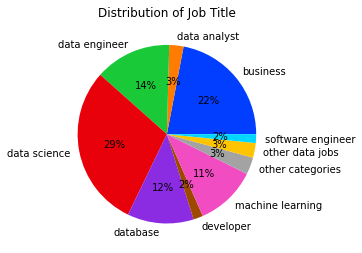

In [16]:
subject_ind = dataset1.groupby('Title_job')['Title_job'].count().index
subject_val = dataset1.groupby('Title_job')['Title_job'].count().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Job Title')

I added new feature and droped orginal feature

in addition, created new dataset to continue

### Company feature
- Analyze the values, most of the companies just posted one job on this platform
- Find the relation between the company with the most posted job and the needed jobs of them

In [17]:
check_repeated_companies = dataset1.Company.groupby(dataset.Company).count()

In [18]:
check_repeated_companies[check_repeated_companies >= 4].index

Index(['Apex Systems', 'Apple', 'Artech Consulting LLC', 'Bayer', 'CVS Health',
       'Calance US', 'Capgemini', 'Capital One', 'Cash App', 'Chewy', 'Ezoic',
       'JPMorgan Chase Bank, N.A.', 'MTG Services', 'Nike',
       'PNC Financial Services Group', 'Phasorsoft LLC', 'Radcube LLC',
       'Robert Half', 'Sandhills Global, Inc.', 'Strategic Employment',
       'UnitedHealth Group', 'University of Illinois'],
      dtype='object', name='Company')

In [19]:
len(check_repeated_companies)

883

In [20]:
df_crc = pd.DataFrame(check_repeated_companies.groupby(check_repeated_companies).sum())

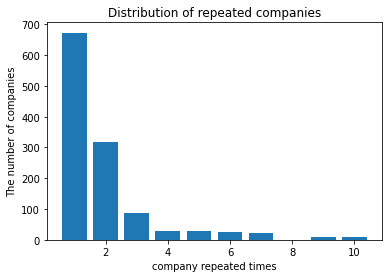

In [21]:
plt.bar(df_crc.index, df_crc.Company)
plt.xlabel('company repeated times')
plt.ylabel('The number of companies')
plt.title('Distribution of repeated companies')
plt.show()

In [22]:
dataset1_c = dataset1[pd.DataFrame(dataset1.Company.tolist()).
                      isin(list(check_repeated_companies[check_repeated_companies >= 4].index)).values]

In [23]:
pd.DataFrame(dataset1_c.groupby(['Company','Title_job'])['Location'].count()).unstack().fillna(0)

Location                                          \
Title_job                    business data analyst data engineer data science   
Company                                                                         
Apex Systems                      3.0          0.0           0.0          0.0   
Apple                             1.0          0.0           0.0          3.0   
Artech Consulting LLC             0.0          0.0           0.0          0.0   
Bayer                             0.0          0.0           2.0          1.0   
CVS Health                        0.0          0.0           1.0          6.0   
Calance US                        0.0          0.0           5.0          0.0   
Capgemini                         0.0          0.0           2.0          0.0   
Capital One                       0.0          0.0           2.0          5.0   
Cash App                          2.0          0.0           0.0          2.0   
Chewy                             0.0          0.0           0.0          6.0   
Ezoic                             0.0          0.0           0.0          0.0   
JPMorgan Chase Bank, N.A.         1.0          0.0           0.0          2.0   
MTG Services                      0.0          0.0           0.0          5.0   
Nike                              0.0          0.0           0.0          1.0   
PNC Financial Services Group      0.0          0.0           0.0          1.0   
Phasorsoft LLC                    0.0          0.0           0.0          1.0   
Radcube LLC                       0.0          0.0           2.0          2.0   
Robert Half                       1.0          0.0           0.0          0.0   
Sandhills Global, Inc.            4.0          0.0           2.0          0.0   
Strategic Employment              0.0          0.0           0.0          0.0   
UnitedHealth Group                1.0          1.0           0.0          0.0   
University of Illinois            0.0          0.0           0.0          0.0   

                                                                  \
Title_job                    database developer machine learning   
Company                                                            
Apex Systems                      0.0       1.0              0.0   
Apple                             0.0       0.0              0.0   
Artech Consulting LLC             0.0       0.0              0.0   
Bayer                             0.0       0.0              2.0   
CVS Health                        1.0       0.0              0.0   
Calance US                        0.0       0.0              0.0   
Capgemini                         0.0       1.0              0.0   
Capital One                       0.0       0.0              0.0   
Cash App                          0.0       0.0              2.0   
Chewy                             0.0       0.0              0.0   
Ezoic                             0.0       0.0              0.0   
JPMorgan Chase Bank, N.A.         1.0       0.0              0.0   
MTG Services                      0.0       0.0              0.0   
Nike                              0.0       0.0              1.0   
PNC Financial Services Group      0.0       0.0              0.0   
Phasorsoft LLC                    0.0       1.0              2.0   
Radcube LLC                       0.0       0.0              0.0   
Robert Half                       0.0       0.0              0.0   
Sandhills Global, Inc.            1.0       0.0              0.0   
Strategic Employment              5.0       0.0              0.0   
UnitedHealth Group                0.0       0.0              1.0   
University of Illinois            0.0       0.0              0.0   

                                                               \
Title_job                    other categories other data jobs   
Company                                                         
Apex Systems                              0.0             2.0   
Apple                                     

Text(0.5, 1.0, 'Distribution of Job Title based on most repeated companies ads')

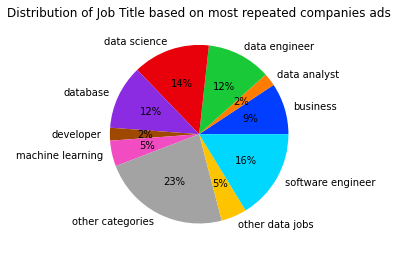

In [24]:
subject_ind = pd.DataFrame(dataset1_c.groupby(['Company','Title_job'])['Location'].count()).groupby(['Title_job']).max().index
subject_val = pd.DataFrame(dataset1_c.groupby(['Company','Title_job'])['Location'].count()).unstack().groupby(['Company']).fillna(0).max().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Job Title based on most repeated companies ads')

### Location feature
- Standardized and find the distribution
- Find the relation between the Location and the title

In [25]:
dataset1.groupby(['Location']).Location.count().sort_values(ascending=False)

Location
Remote                                           283
+1 locationRemote                                 52
New York, NY                                      25
Remote in New York, NY                            13
+2 locationsRemote                                12
                                                ... 
Hybrid remote in Texhoma, TX 73949                 1
Hybrid remote in Stevens Point, WI 54482           1
Hybrid remote in Seattle, WA 98134                 1
Hybrid remote in Seattle, WA 98109+1 location      1
Woonsocket, RI 02895                               1
Name: Location, Length: 584, dtype: int64

In [26]:
dataset1.Location.str.contains('Remote').sum()
# CA 135 # NY 108 # TX 60 # WI 12 # WA 24 # MA 37 # MN 14 # TN 10 # IL 39 # CT 12 # MD 23 # CO 28 # NJ 34 # NC 18 # GA 28
# DC 25 # OH 20 # OR 23 # VA 26 # PA 23 # FL 21 # MI 14 # MO 12 # NE 10

611

In [27]:
dataset1[~dataset1.Location.str.contains(', NY') & ~dataset1.Location.str.contains(', WA')
        & ~dataset1.Location.str.contains(', TX') & ~dataset1.Location.str.contains(', WI')
        & ~dataset1.Location.str.contains(', MA') & ~dataset1.Location.str.contains(', MN')
        & ~dataset1.Location.str.contains(', TN') & ~dataset1.Location.str.contains(', CA')
        & ~dataset1.Location.str.contains(', IL') & ~dataset1.Location.str.contains('Remote')
        & ~dataset1.Location.str.contains(', CT') & ~dataset1.Location.str.contains(', MD')
        & ~dataset1.Location.str.contains(', CO') & ~dataset1.Location.str.contains(', NJ')
        & ~dataset1.Location.str.contains(', NC') & ~dataset1.Location.str.contains(', GA')
        & ~dataset1.Location.str.contains(', DC') & ~dataset1.Location.str.contains(', OH')
        & ~dataset1.Location.str.contains(', OR') & ~dataset1.Location.str.contains(', VA')
        & ~dataset1.Location.str.contains(', MI') & ~dataset1.Location.str.contains(', OK')
        & ~dataset1.Location.str.contains(', PA') & ~dataset1.Location.str.contains(', FL')
        & ~dataset1.Location.str.contains(', NE') & ~dataset1.Location.str.contains(', MO')]['Location'].tail(30)

623              Las Vegas, NV 89101 (Downtown area)
624              Las Vegas, NV 89101 (Downtown area)
626                                   South Carolina
630                                       New Jersey
639                                            Texas
664                           Phoenix, AZ+1 location
671                             Birmingham, AL 35298
706                            Little Rock, AR 72223
724             West Des Moines, IA 50265+1 location
745                          Clemson, SC+3 locations
747                Olive Branch, MS 38654+1 location
758                  Provo, UT 84606 (East Bay area)
803                        +4 locationsHybrid remote
817                          Phoenix, AZ+2 locations
839     Scottsdale, AZ 85260 (North Scottsdale area)
846                                   Birmingham, AL
847                                   North Carolina
849                             South Bend, IN 46628
875                           Indianapolis, IN

In [28]:
def Location_cleaning(string):
    if ', CA' in string:
        return 'CA'
    elif ', NY' in string:
        return 'NY'
    elif ', TX' in string:
        return 'TX'
    elif ', WI' in string:
        return 'WI'
    elif ', WA' in string:
        return 'WA'
    elif ', MA' in string:
        return 'MA'
    elif ', MN' in string:
        return 'MN'
    elif ', TN' in string:
        return 'TN'
    elif ', IL' in string:
        return 'IL'
    elif ', CT' in string:
        return 'CT'
    elif ', MD' in string:
        return 'MD'
    elif ', CO' in string:
        return 'CO'
    elif ', NJ' in string:
        return 'NJ'
    elif ', NC' in string:
        return 'NC'
    elif ', GA' in string:
        return 'GA'
    elif ', DC' in string:
        return 'DC'
    elif ', OH' in string:
        return 'OH'
    elif ', OR' in string:
        return 'OR'
    elif ', VA' in string:
        return 'VA'
    elif ', PA' in string:
        return 'PA'
    elif ', FL' in string:
        return 'FL'
    elif ', MI' in string:
        return 'MI'
    elif ', MO' in string:
        return 'MO'
    elif ', NE' in string:
        return 'NE'
    elif 'remote' in string.lower():
        return 'remote'
    else:
        return 'other loc'
    

In [29]:
dataset1['location_clean'] = dataset1.Location.apply(Location_cleaning)

In [30]:
dataset2 = dataset1.drop('Location', axis= 1)

In [31]:
dataset2.head()

,Company,Rating,Date,Salary,Description,Links,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,data science,CA
1,Sabot Consulting,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,business,TN
3,Longevity Holdings Inc.,NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,data engineer,MN
4,WKI Kenworth,NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,developer,other loc


In [32]:
df_location = pd.DataFrame(dataset2.groupby('location_clean').location_clean.count().sort_values(ascending=False))

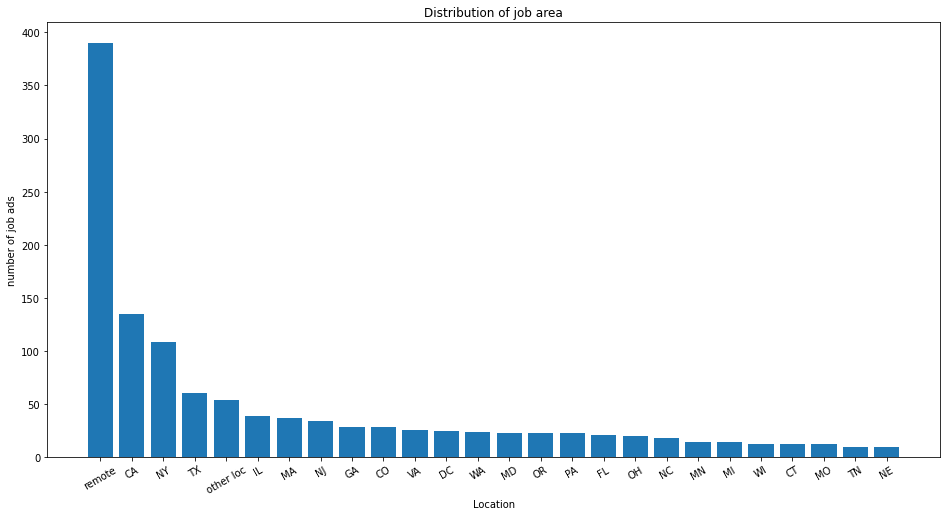

In [33]:
plt.figure(figsize=(16,8))
plt.bar(df_location.index, df_location.location_clean)
plt.xlabel('Location')
plt.xticks(rotation=30)
plt.ylabel('number of job ads')
plt.title('Distribution of job area')
plt.show()

In [34]:
df_location.T

location_clean,remote,CA,NY,TX,other loc,IL,MA,NJ,GA,CO,...,FL,OH,NC,MN,MI,WI,CT,MO,TN,NE
location_clean,390,135,108,60,54,39,37,34,28,28,...,21,20,18,14,14,12,12,12,10,10


In [35]:
dataset2_c = dataset2[pd.DataFrame(dataset2.location_clean.tolist()).
                      isin(list(df_location[df_location >= 60].index)).values]

In [36]:
graph_loc_c = pd.DataFrame(dataset2_c.groupby(['location_clean','Title_job'])['Company'].
             count()).unstack().groupby(['location_clean']).fillna(0).max().unstack().T

Text(0.5, 1.0, 'Distribution of Job Title based on location ads')

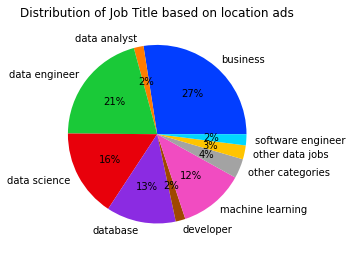

In [37]:
subject_ind = graph_loc_c.index
subject_val = graph_loc_c.Company

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Job Title based on location ads')

In [38]:
pd.DataFrame(dataset2_c.groupby(['location_clean','Title_job'])['location_clean'].count()).unstack().fillna(0)

location_clean                                          \
Title_job            business data analyst data engineer data science   
location_clean                                                          
CA                        8.0          1.0          19.0         55.0   
CO                        2.0          2.0           2.0          8.0   
CT                        5.0          0.0           0.0          4.0   
DC                        8.0          2.0           1.0          4.0   
FL                        4.0          0.0           0.0          6.0   
GA                        2.0          4.0           2.0         10.0   
IL                       10.0          1.0           2.0         11.0   
MA                       11.0          1.0           2.0         14.0   
MD                        6.0          0.0           0.0          8.0   
MI                        3.0          0.0           1.0          2.0   
MN                        3.0          1.0           4.0          6.0   
MO                        3.0          0.0           2.0          6.0   
NC                        1.0          0.0           3.0          5.0   
NE                        6.0          0.0           0.0          0.0   
NJ                        6.0          0.0           3.0          8.0   
NY                       10.0          5.0          13.0         60.0   
OH                        2.0          3.0           1.0          9.0   
OR                       13.0          0.0           2.0          3.0   
PA                        3.0          0.0           3.0          7.0   
TN                        8.0          0.0           0.0          1.0   
TX                       20.0          1.0           3.0         18.0   
VA                        3.0          2.0           6.0         12.0   
WA                        2.0          0.0           4.0         11.0   
WI                        3.0          1.0           0.0          5.0   
other loc                13.0          0.0          11.0         17.0   
remote                  109.0          7.0          82.0         63.0   

                                                                     \
Title_job      database developer machine learning other categories   
location_clean                                                        
CA                  5.0       0.0             30.0              3.0   
CO                  8.0       1.0              3.0              0.0   
CT                  1.0       0.0              0.0              1.0   
DC                  8.0       0.0              1.0              0.0   
FL                  6.0       1.0              1.0              3.0   
GA                  5.0       1.0              2.0              1.0   
IL                  1.0       0.0              8.0              0.0   
MA                  0.0       0.0              5.0              2.0   
MD                  9.0       0.0              0.0              0.0   
MI                  5.0       0.0              3.0              0.0   
MN                  0.0       0.0              0.0              0.0   
MO                  1.0       0.0              0.0              0.0   
NC                  5.0       1.0              1.0              0.0   
NE                  3.0       1.0              0.0              0.0   
NJ                  1.0       4.0              3.0              4.0   
NY                  3.0       1.0             14.0              1.0   
OH                  5.0       0.0              0.0              0.0   
OR                  3.0       0.0              0.0              2.0   
PA                  4.0       1.0              1.0              3.0   
TN                  0.0       0.0              0.0              1.0   
TX                  7.0       1.0              6.0              1.0   
VA                  1.0       0.0              1.0              0.0   
WA                  3.0       0.0              3.0              1.0   
WI                  1.0       1.0              1.0 

### Rating feature
- Manipulate the Null values
- Distribution Rating based on Title

In [39]:
dataset2.head()

,Company,Rating,Date,Salary,Description,Links,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,data science,CA
1,Sabot Consulting,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,business,TN
3,Longevity Holdings Inc.,NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,data engineer,MN
4,WKI Kenworth,NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,developer,other loc


#### Use the mean of the value of rating when the jobs exist on the same location and same title

In [40]:
fillna_rating = dataset2.groupby(['Title_job','location_clean'])['Rating'].mean().fillna(0)

In [41]:
fillna_rating

Title_job          location_clean
business           CA                3.8200
                   CO                3.6000
                   CT                3.9800
                   DC                3.6400
                   FL                3.3000
                                      ...  
other data jobs    remote            3.7000
software engineer  CA                4.4375
                   IL                4.2000
                   NJ                3.8000
                   remote            3.7000
Name: Rating, Length: 167, dtype: float64

In [42]:
for i in range(0,len(fillna_rating)):
    rule = (dataset2.Title_job == fillna_rating.index[i][0]) & (dataset2.location_clean == fillna_rating.index[i][1])
    dataset2.loc[rule, 'Rating'] = dataset2.loc[rule, 'Rating'].fillna(format(fillna_rating.values[i],'.2'))

In [43]:
dataset2.isnull().sum()

Company             0
Rating              0
Date                0
Salary            618
Description         0
Links               0
Descriptions        0
Title_job           0
location_clean      0
dtype: int64

In [44]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1200 non-null   object
 1   Rating          1200 non-null   object
 2   Date            1200 non-null   object
 3   Salary          582 non-null    object
 4   Description     1200 non-null   object
 5   Links           1200 non-null   object
 6   Descriptions    1200 non-null   object
 7   Title_job       1200 non-null   object
 8   location_clean  1200 non-null   object
dtypes: object(9)
memory usage: 84.5+ KB


In [45]:
dataset2['Rating'] = dataset2.Rating.astype(float)

In [46]:
dataset2.groupby(['Title_job'])['Rating'].mean()

Title_job
business             3.576894
data analyst         3.406452
data engineer        3.592169
data science         3.705382
database             3.636111
developer            3.280952
machine learning     3.805263
other categories     3.535135
other data jobs      3.668750
software engineer    4.168421
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Ratings per Job dvs')

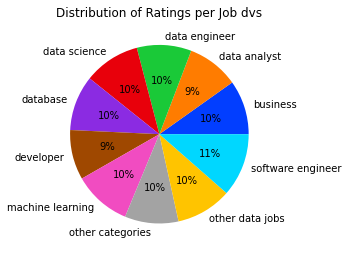

In [47]:
subject_ind = dataset2.groupby(['Title_job'])['Rating'].mean().index
subject_val = dataset2.groupby(['Title_job'])['Rating'].mean().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Ratings per Job dvs')

### Date feature
-  Visual based on the category

In [48]:
dataset2.Date.groupby(dataset2.Date).count()

Date
EmployerActive 1 day ago       35
EmployerActive 10 days ago      2
EmployerActive 11 days ago      7
EmployerActive 15 days ago      2
EmployerActive 18 days ago      1
EmployerActive 2 days ago      56
EmployerActive 3 days ago      22
EmployerActive 4 days ago      15
EmployerActive 5 days ago       8
EmployerActive 6 days ago       6
EmployerActive 8 days ago       2
EmployerActive 9 days ago       4
Hiring ongoing                 20
PostedJust posted               2
PostedPosted 1 day ago         46
PostedPosted 10 days ago       23
PostedPosted 11 days ago       32
PostedPosted 12 days ago       26
PostedPosted 13 days ago       18
PostedPosted 14 days ago        2
PostedPosted 15 days ago        9
PostedPosted 16 days ago       26
PostedPosted 17 days ago       27
PostedPosted 18 days ago       13
PostedPosted 19 days ago       18
PostedPosted 2 days ago        75
PostedPosted 20 days ago        5
PostedPosted 21 days ago        8
PostedPosted 22 days ago        6
PostedPos

In [49]:
date_emp = dataset2[dataset2.Date.str.contains('EmployerActive')]
date_post = dataset2[dataset2.Date.str.contains('PostedPosted')]
date_other = dataset2[~dataset2.Date.str.contains('PostedPosted') & ~dataset2.Date.str.contains('EmployerActive')]

In [50]:
date_other.head()

,Company,Rating,Date,Salary,Description,Links,Descriptions,Title_job,location_clean
27,Pepsico,3.8,Hiring ongoing,"$90,000 - $100,000 a year",Manage and scale data pipelines from internal ...,https://www.indeed.com/company/PepsiCo/jobs/Ju...,"Compensation: $80k - $90k\nBenefits: Medical, ...",data engineer,remote
31,Dworo.io,3.7,Hiring ongoing,"$78,000 - $98,000 a year",Define configuration specifications and busine...,https://www.indeed.com/company/Dworo.io/jobs/B...,We are looking for a Business Analyst who will...,business,TX
36,Cognoticai,4.2,Hiring ongoing,$85 - $95 an hour,7+ years of overall software development and/o...,https://www.indeed.com/company/Cognoticai/jobs...,7+ years of overall software development and/o...,data engineer,CA
37,Kaiser Permanente,4.1,PostedToday,NaN,Completes work assignments by applying up-to-d...,https://www.indeed.com/rc/clk?jk=3a088535bc27d...,Job Summary:\n\nIn addition to the responsibil...,data science,CA
60,PCS Global Tech,3.3,Hiring ongoing,"$98,931 - $105,918 a year",Developing and managing business intelligence ...,https://www.indeed.com/company/PCS-GLOBAL-TECH...,At PCS Global Tech we care about the professio...,business,CA


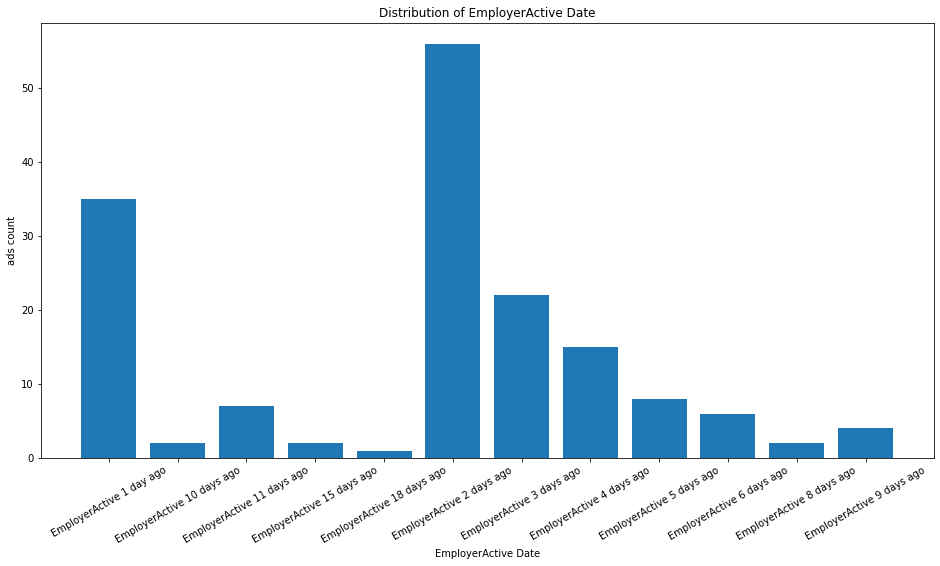

In [51]:
plt.figure(figsize=(16,8))
plt.bar(date_emp.groupby(['Date'])['Title_job'].count().index,date_emp.groupby(['Date'])['Title_job'].count().values)
plt.xlabel('EmployerActive Date')
plt.xticks(rotation=30)
plt.ylabel('ads count')
plt.title('Distribution of EmployerActive Date')
plt.show()

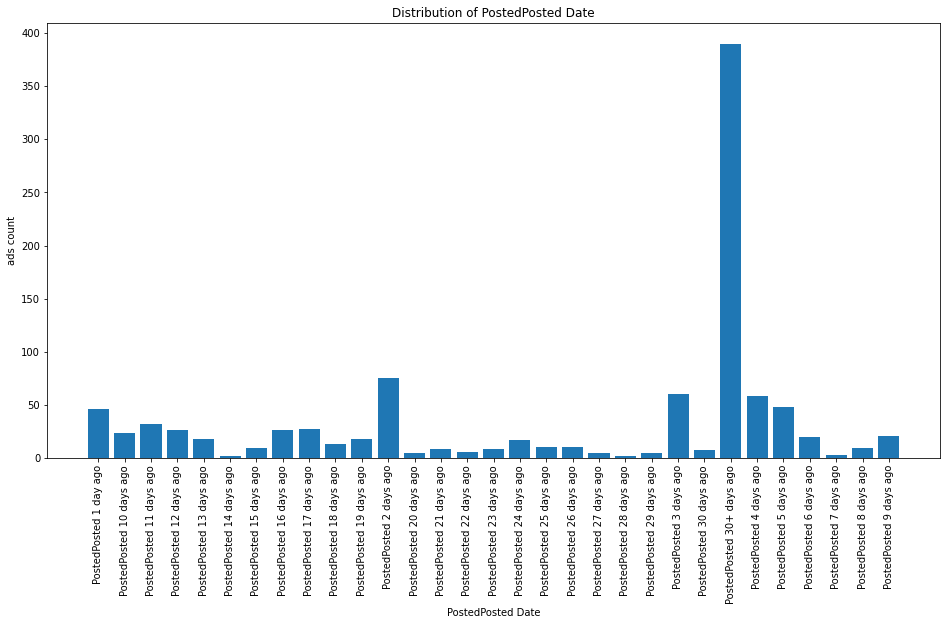

In [52]:
plt.figure(figsize=(16,8))
plt.bar(date_post.groupby(['Date'])['Title_job'].count().index,date_post.groupby(['Date'])['Title_job'].count().values)
plt.xlabel('PostedPosted Date')
plt.xticks(rotation=90)
plt.ylabel('ads count')
plt.title('Distribution of PostedPosted Date')
plt.show()

#### Peak on the old open positions

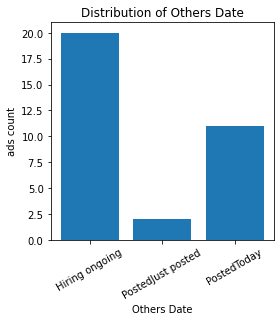

In [53]:
plt.figure(figsize=(4,4))
plt.bar(date_other.groupby(['Date'])['Title_job'].count().index,date_other.groupby(['Date'])['Title_job'].count().values)
plt.xlabel('Others Date')
plt.xticks(rotation=30)
plt.ylabel('ads count')
plt.title('Distribution of Others Date')
plt.show()

### Salary & Links features

more than half of Salary feature is null and Links feature in this job is not necessary so I will drop both of these features

In [54]:
dataset3 = dataset2.drop(['Salary','Links'], axis = 1)

In [55]:
dataset3.head()

,Company,Rating,Date,Description,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,You’ll be working alongside a team of eight an...,We invite you to join us at Driven Brands!\nHe...,data science,CA
1,Sabot Consulting,3.6,PostedPosted 4 days ago,Preferred candidates will have prior experienc...,Sabot Consulting (Sabot) is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,Job Details Apply Save Print this job Email a…,Job Details\nApply\nSave\nPrint this job\nEmai...,business,TN
3,Longevity Holdings Inc.,3.8,PostedPosted 3 days ago,Incorporate core data management competencies ...,Position: Data Engineer\nLocation: MN\nAs a Da...,data engineer,MN
4,WKI Kenworth,0.0,EmployerActive 2 days ago,The Network Administrator provides 2nd level e...,Full Job Description\nThe Network Administrato...,developer,other loc


### Description & Descriptions features
- Clean the features
- Check the most repeated words

I will use the function has been provided by another author to make first level of cleaning and continue on them

In [56]:
dataset3['Description'] = dataset3.Description.astype(str).str.lower()  # convert text to lowercase
dataset3['Description'] = dataset3.Description.apply(parser)
dataset3['Description'] = dataset3.Description.apply(normalize)
dataset3['Description'] = dataset3.Description.apply(remove_URL)
dataset3['Description'] = dataset3.Description.apply(remove_spaces)
dataset3['Description'] = dataset3.Description.apply(remove_nonletter)
dataset3.Description.head()

0    youll be working alongside a team of eight ana...
1    preferred candidates will have prior experienc...
2       job details apply save print this job email a 
3    incorporate core data management competencies ...
4    the network administrator provides  nd level e...
Name: Description, dtype: object

In [57]:
dataset3['Descriptions'] = dataset3.Descriptions.astype(str).str.lower()  # convert text to lowercase
dataset3['Descriptions'] = dataset3.Descriptions.apply(parser)
dataset3['Descriptions'] = dataset3.Descriptions.apply(normalize)
dataset3['Descriptions'] = dataset3.Descriptions.apply(remove_URL)
dataset3['Descriptions'] = dataset3.Descriptions.apply(remove_spaces)
dataset3['Descriptions'] = dataset3.Descriptions.apply(remove_nonletter)
dataset3.Description.head()

0    youll be working alongside a team of eight ana...
1    preferred candidates will have prior experienc...
2       job details apply save print this job email a 
3    incorporate core data management competencies ...
4    the network administrator provides  nd level e...
Name: Description, dtype: object

In [58]:
dataset3

,Company,Rating,Date,Description,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,youll be working alongside a team of eight ana...,we invite you to join us at driven brands hea...,data science,CA
1,Sabot Consulting,3.6,PostedPosted 4 days ago,preferred candidates will have prior experienc...,sabot consulting sabot is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,job details apply save print this job email a,job details apply save print this job email a ...,business,TN
3,Longevity Holdings Inc.,3.8,PostedPosted 3 days ago,incorporate core data management competencies ...,position data engineer location mn as a data...,data engineer,MN
4,WKI Kenworth,0.0,EmployerActive 2 days ago,the network administrator provides nd level e...,full job description the network administrator...,developer,other loc
...,...,...,...,...,...,...,...
1195,HyperScience,3.9,PostedPosted 24 days ago,we turn ml lab experiments into enterpriseread...,company description hyperscience is transformi...,machine learning,remote
1196,N9 it solutions,3.6,PostedPosted 4 days ago,experience using a variety of data mining data...,job title data scientist position w emplo...,data science,remote
1197,Marathon TS,3.7,PostedPosted 2 days ago,years working with databases data modeling ...,data engineer power bi location remote based...,data engineer,remote
1198,Red Ventures,3.2,PostedPosted 30+ days ago,you will be responsible for overseeing the tea...,in this role you will have the opportunity to...,data science,NY


In [59]:
import pandasql as ps
import wordcloud
from wordcloud import WordCloud, STOPWORDS

(-0.5, 1599.5, 799.5, -0.5)

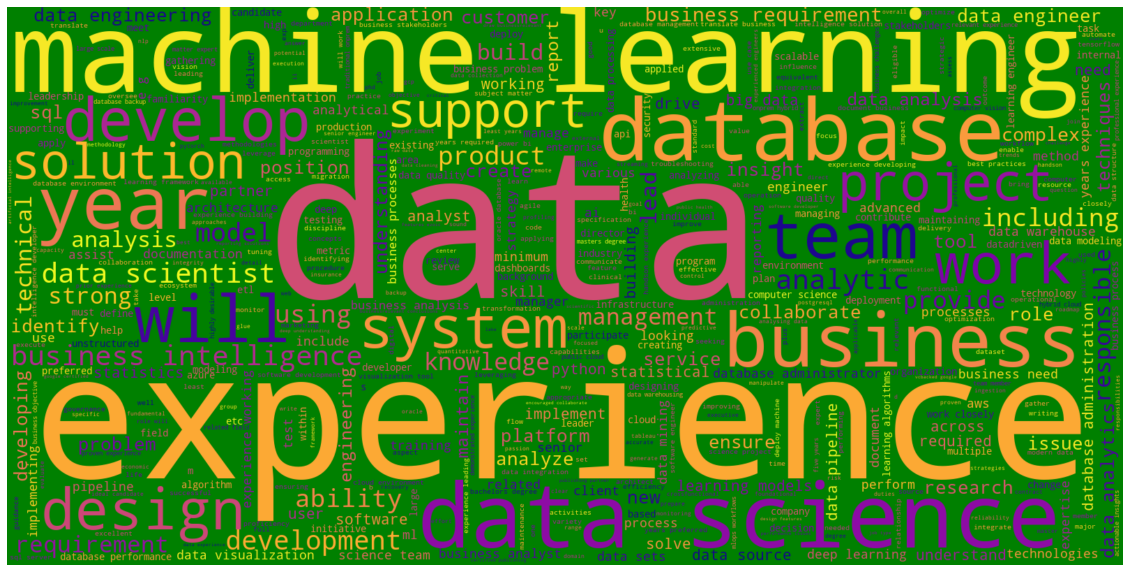

In [60]:
word_string=" ".join(dataset3.Description.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="green", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

#### The most repeated words: 
- Data,
- experience,
- project,
- support,
- machine learning

(-0.5, 1599.5, 799.5, -0.5)

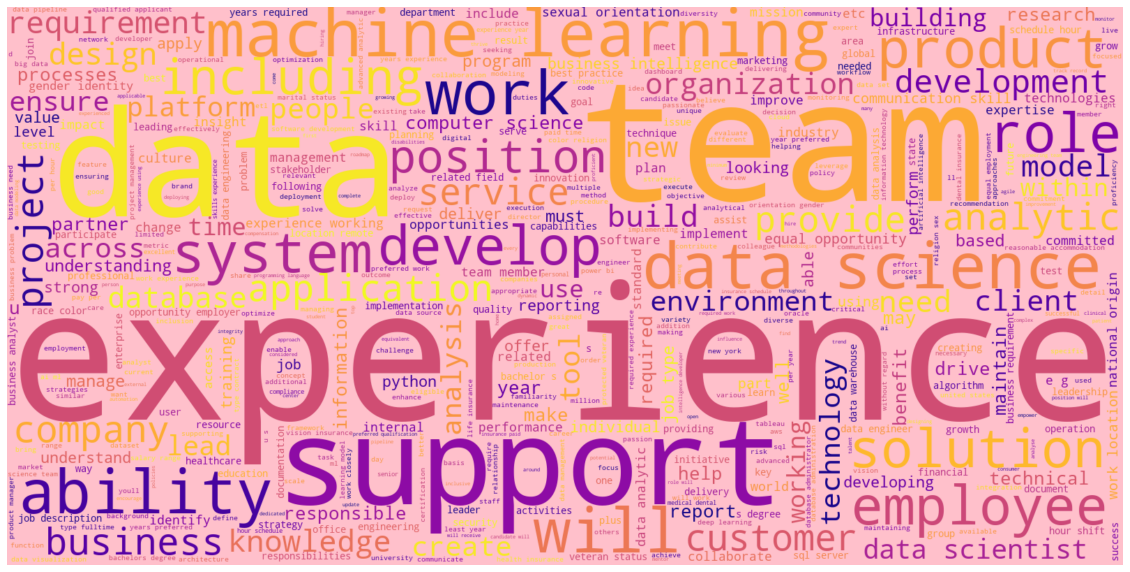

In [61]:
word_string=" ".join(dataset3.Descriptions.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="pink", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

#### The most repeated words: 
- experience,
- support,
- team,
- system,
- ability,
- machine learning,
- Data Science

## Check the manipulated data in Rating Feature

Use the machine learning algorithms to check the manipulation

### Data Preparation

In [62]:
dataset3.head()

,Company,Rating,Date,Description,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,youll be working alongside a team of eight ana...,we invite you to join us at driven brands hea...,data science,CA
1,Sabot Consulting,3.6,PostedPosted 4 days ago,preferred candidates will have prior experienc...,sabot consulting sabot is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,job details apply save print this job email a,job details apply save print this job email a ...,business,TN
3,Longevity Holdings Inc.,3.8,PostedPosted 3 days ago,incorporate core data management competencies ...,position data engineer location mn as a data...,data engineer,MN
4,WKI Kenworth,0.0,EmployerActive 2 days ago,the network administrator provides nd level e...,full job description the network administrator...,developer,other loc


I will replace the categorical features with repeated time of occurance of each value

In [63]:
dataset3['Company_numeric'] = dataset3.Company.replace(dict(dataset3.Company.value_counts()))
dataset3['Date_numeric'] = dataset3.Date.replace(dict(dataset3.Date.value_counts()))
dataset3['Title_job_numeric'] = dataset3.Title_job.replace(dict(dataset3.Title_job.value_counts()))
dataset3['location_clean_numeric'] = dataset3.location_clean.replace(dict(dataset3.location_clean.value_counts()))

In [64]:
dataset4 = dataset3.drop(['Company','Date','Title_job','location_clean'], axis= 1)

In [65]:
dataset4.head()

,Rating,Description,Descriptions,Company_numeric,Date_numeric,Title_job_numeric,location_clean_numeric
0,2.4,youll be working alongside a team of eight ana...,we invite you to join us at driven brands hea...,1,10,353,135
1,3.6,preferred candidates will have prior experienc...,sabot consulting sabot is a management consu...,2,58,264,390
2,3.0,job details apply save print this job email a,job details apply save print this job email a ...,2,390,264,10
3,3.8,incorporate core data management competencies ...,position data engineer location mn as a data...,1,60,166,14
4,0.0,the network administrator provides nd level e...,full job description the network administrator...,1,56,21,54


In [66]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  1200 non-null   float64
 1   Description             1200 non-null   object 
 2   Descriptions            1200 non-null   object 
 3   Company_numeric         1200 non-null   int64  
 4   Date_numeric            1200 non-null   int64  
 5   Title_job_numeric       1200 non-null   int64  
 6   location_clean_numeric  1200 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 65.8+ KB


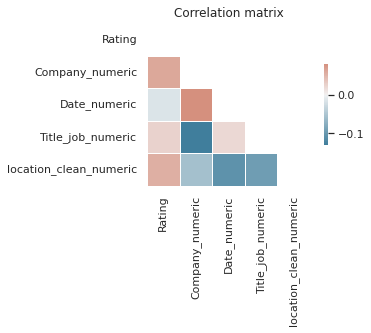

In [67]:
sns.set_theme(style="white")
df_corr = dataset4.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(5, 3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix')
plt.show()

Intersting result, the Title_Job has strong opposite correlation with Company and Company has strong correlation with Date 

In [68]:
dataset4['Description_l'] = dataset4.Description.apply(len)
dataset4['Descriptions_l'] = dataset4.Descriptions.apply(len)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
optimal_length_description = int(np.quantile(dataset4.Description_l.fillna(0),.95))
optimal_length_descriptions = int(np.quantile(dataset4.Descriptions_l.fillna(0),.95))

In [71]:
X_RE = dataset4.drop(['Description','Descriptions'],axis=1)

In [72]:
df_Description = dataset4['Description']
df_descriptions = dataset4['Descriptions']

In [73]:
X = X_RE.drop('Rating',axis=1)
y = dataset4.Rating

In [74]:
X_RE

,Rating,Company_numeric,Date_numeric,Title_job_numeric,location_clean_numeric,Description_l,Descriptions_l
0,2.4,1,10,353,135,150,2463
1,3.6,2,58,264,390,151,2665
2,3.0,2,390,264,10,46,52
3,3.8,1,60,166,14,161,3384
4,0.0,1,56,21,54,148,3572
...,...,...,...,...,...,...,...
1195,3.9,1,17,133,390,141,3423
1196,3.6,1,58,353,390,160,5004
1197,3.7,1,75,166,390,159,2082
1198,3.2,1,390,353,108,159,6083


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_RE, y,test_size = 0.2,random_state = 0, stratify = y)

#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_test.shape))
print("y_val shape: {}".format(y_test.shape))

X_train shape: (960, 7)
y_train shape: (960,)
X_val shape: (240, 7)
y_val shape: (240,)


### Modeling and Evaluation

In [77]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import process_time

In [78]:
default_result = {}
def traditional_regression_model_default(X_train, X_val, y_train, y_val, kind=['RandomForest','GradientBoosting','LinearRegression','SVM']):
  # This function is defined for default model of each algorithms
  import math
  if kind == 'RandomForest':
    model = RandomForestRegressor()
  elif kind == 'GradientBoosting':
    model = GradientBoostingRegressor()
  elif kind == 'LinearRegression':
    model = LinearRegression()
  elif kind == 'SVM':
    model = SVR()
  start_t = process_time()
  model.fit(X_train,y_train)
  end_t = process_time()
  # evaluation
  y_train_pred = model.predict(X_train)
  y_val_pred = model.predict(X_val)
  # r2 score
  r2_score_train = r2_score(y_train, y_train_pred)
  r2_score_val = r2_score(y_val, y_val_pred)
  # RMSE
  RMSE_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
  RMSE_val = math.sqrt(mean_squared_error(y_val, y_val_pred))
  # MAE
  MAE_train = mean_absolute_error(y_train, y_train_pred)
  MAE_val = mean_absolute_error(y_val, y_val_pred)
  default_result[kind] = [end_t-start_t,r2_score_train,r2_score_val,RMSE_train,RMSE_val,MAE_train,MAE_val]
  return default_result, y_val_pred, MAE_train, MAE_val

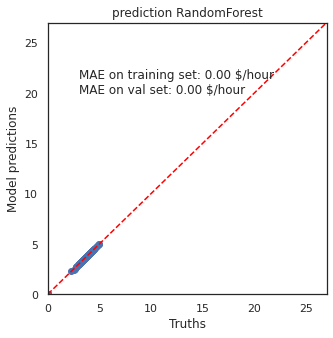

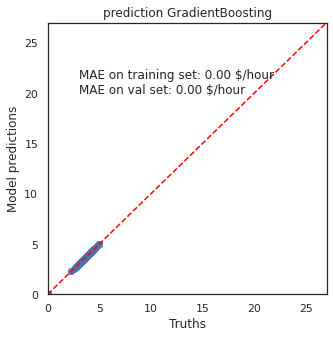

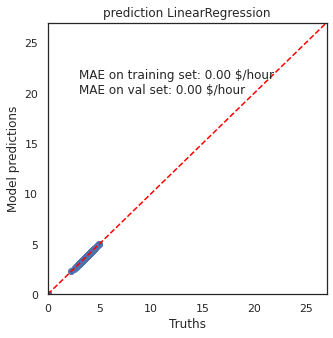

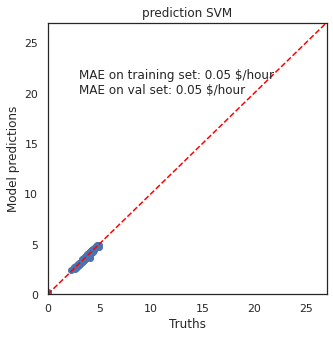

In [79]:
default_result = {}
models = ['RandomForest','GradientBoosting','LinearRegression','SVM']
for item in models:
  default_result, y_val_pred, MAE_train, MAE_val = traditional_regression_model_default(X_train, X_test, y_train, y_test,item)
  string_score = f"MAE on training set: {MAE_train:.2f} $/hour"
  string_score += f"\nMAE on val set: {MAE_val:.2f} $/hour"

  fig, ax = plt.subplots(figsize=(5, 5))
  plt.scatter(y_test, y_val_pred)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
  plt.text(3, 20, string_score)
  plt.title("prediction {0}".format(item))
  plt.ylabel("Model predictions")
  plt.xlabel("Truths")
  plt.xlim([0, 27])
  _ = plt.ylim([0, 27])

In [80]:
pd_default_result = pd.DataFrame(default_result).T
pd_default_result.index.name = 'Default Model'
pd_default_result.columns = ['Training_time', 'train_r2_score', 'val_r2_score', 'train_RMSE', 'val_RMSE', 'train_MAE', 'val_MAE']
pd_default_result.sort_index()

,Training_time,train_r2_score,val_r2_score,train_RMSE,val_RMSE,train_MAE,val_MAE
Default Model,,,,,,,
GradientBoosting,0.107326,1.000000,0.999999,5.373948e-05,6.447629e-04,2.346832e-05,6.332618e-05
LinearRegression,0.002297,1.000000,1.000000,5.074035e-16,5.199512e-16,2.685352e-16,2.905084e-16
RandomForest,0.227005,0.999985,0.999922,2.628371e-03,5.952940e-03,3.791667e-04,9.125000e-04
SVM,0.012837,0.989499,0.986120,6.985442e-02,7.949881e-02,4.630553e-02,5.342209e-02
